# Geolife Trajectories Dataset  1.3

This notebook demonstrates how to extract and pre-process geolife trajectories dataset.

Download the geolife 1.3 trajectory dataset (available as a zip file) and extract it under relative folder named `__data__`

The trajectories are stored as `.plt` files under path `__data__\Geolife Trajectories 1.3\Data` 

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from known import Remap
from geolife.glds import delta_low, delta_high, xl, xh, yl, yh, sample_resolution, sample_interval

# Read Data

In [2]:
# base folder extracted from zip
dataset_path = os.path.join("__data__", "Geolife Trajectories 1.3", "Data")
print(dataset_path)

# each folder is a user # each user has some trajectories
user_ids = os.listdir(dataset_path)
print(len(user_ids)) #<---- total number of users, each user has multiple trajectories

__data__\Geolife Trajectories 1.3\Data
182


# Extract and Filter Trajectory Data

extract trajectories and preprocess them

In [4]:
# convert to csv files and save them at this location
save_dir = os.path.join("__data__", "Geolife Trajectories CSV")
os.makedirs(save_dir, exist_ok=False)
save_dir

'__data__\\Geolife Trajectories CSV'

filtering params

In [5]:
# filter trajectories - according to required sub-regions
dl, dh = pd.Timedelta(seconds=delta_low), pd.Timedelta(seconds=delta_high)

filtering function

In [6]:
# the filtering function
def read_plt(uid, user_trajectories):
    header = ','.join(['x', 'y', 'u', 'z' ,'n', 'd', 't'])

    for i in tqdm(range(len(user_trajectories))):
        save_as = os.path.join(save_dir, f'{uid}_{i}.csv')
    
        path = user_trajectories[i][-1]
        with open(path, 'r') as f: 
            # skip first 6 lines
            for _ in range(6): f.readline()
            sx = f.read()
            ss = sx.split('\n')
            
            first_line = ss[0].split(',')
            last_line = ss[-2].split(',')

            # out of bejing
            x_start, y_start = float(first_line[0]), float(first_line[1])
            x_end, y_end = float(last_line[0]), float(last_line[1])
            if x_start<xl or x_start>xh or y_start<yl or y_start>yh \
                or x_end<xl or x_end>xh or y_end<yl or y_end>yh: 
                #print(f'[!] skip {path} -> start and end out of range : {x_start}, {y_start} :: {x_end}, {y_end}')
                continue

            # trajectory length too small or too big
            end_str, start_str = f'{last_line[-2]} {last_line[-1]}', f'{first_line[-2]} {first_line[-1]}'
            #print(start_str, end_str,)
            end_dt= pd.Timestamp( end_str.replace(',', ' '))
            start_dt =  pd.Timestamp(start_str.replace(',', ' '))
            delta =  end_dt-start_dt
            #print(start_dt, end_dt, ' :: ' ,delta)
            # trajectory length
            if delta.seconds<delta_low or delta.seconds>delta_high: 
                #print(f'[!] skip {path} -> out of delta range! : {delta}')
                continue


            # n samples - there are delta.seconds in trajectory, expected samples? = every 10 seconds
            exp_samples = delta.seconds/sample_resolution
            if len(ss)< exp_samples:
                #print(f'[!] skip {path} -> low samples! : {len(ss)} < {exp_samples}')
                continue

            with open(save_as, 'w') as w:
                w.write(f'{header}\n')
                w.write(sx)
        

execute

In [7]:
# execute filtering
for uid in user_ids:
    #user_data[uid] = None
    
    user_data_path = os.path.join(dataset_path,f'{uid}', 'Trajectory')
    user_trajectories = [(t[:-4], os.path.join(user_data_path, t)) for t in os.listdir(user_data_path) if t.endswith('.plt')]
    n_trajectories = len(user_trajectories)
    print(f'{uid} :: [{len(user_trajectories)}] # {user_data_path}')
    read_plt(uid, user_trajectories)

    


000 :: [171] # __data__\Geolife Trajectories 1.3\Data\000\Trajectory


100%|██████████| 171/171 [00:00<00:00, 953.10it/s]


001 :: [71] # __data__\Geolife Trajectories 1.3\Data\001\Trajectory


100%|██████████| 71/71 [00:00<00:00, 676.19it/s]


002 :: [175] # __data__\Geolife Trajectories 1.3\Data\002\Trajectory


100%|██████████| 175/175 [00:00<00:00, 829.43it/s]


003 :: [322] # __data__\Geolife Trajectories 1.3\Data\003\Trajectory


100%|██████████| 322/322 [00:00<00:00, 825.61it/s]


004 :: [395] # __data__\Geolife Trajectories 1.3\Data\004\Trajectory


100%|██████████| 395/395 [00:00<00:00, 1023.27it/s]


005 :: [86] # __data__\Geolife Trajectories 1.3\Data\005\Trajectory


100%|██████████| 86/86 [00:00<00:00, 809.05it/s]


006 :: [28] # __data__\Geolife Trajectories 1.3\Data\006\Trajectory


100%|██████████| 28/28 [00:00<00:00, 889.80it/s]


007 :: [54] # __data__\Geolife Trajectories 1.3\Data\007\Trajectory


100%|██████████| 54/54 [00:00<00:00, 624.82it/s]


008 :: [34] # __data__\Geolife Trajectories 1.3\Data\008\Trajectory


100%|██████████| 34/34 [00:00<00:00, 440.09it/s]


009 :: [49] # __data__\Geolife Trajectories 1.3\Data\009\Trajectory


100%|██████████| 49/49 [00:00<00:00, 527.76it/s]


010 :: [161] # __data__\Geolife Trajectories 1.3\Data\010\Trajectory


100%|██████████| 161/161 [00:00<00:00, 320.53it/s]


011 :: [201] # __data__\Geolife Trajectories 1.3\Data\011\Trajectory


100%|██████████| 201/201 [00:00<00:00, 1429.70it/s]


012 :: [77] # __data__\Geolife Trajectories 1.3\Data\012\Trajectory


100%|██████████| 77/77 [00:00<00:00, 693.98it/s]


013 :: [144] # __data__\Geolife Trajectories 1.3\Data\013\Trajectory


100%|██████████| 144/144 [00:00<00:00, 647.54it/s]


014 :: [279] # __data__\Geolife Trajectories 1.3\Data\014\Trajectory


100%|██████████| 279/279 [00:00<00:00, 807.34it/s]


015 :: [67] # __data__\Geolife Trajectories 1.3\Data\015\Trajectory


100%|██████████| 67/67 [00:00<00:00, 798.42it/s]


016 :: [51] # __data__\Geolife Trajectories 1.3\Data\016\Trajectory


100%|██████████| 51/51 [00:00<00:00, 550.72it/s]


017 :: [391] # __data__\Geolife Trajectories 1.3\Data\017\Trajectory


100%|██████████| 391/391 [00:00<00:00, 590.88it/s]


018 :: [50] # __data__\Geolife Trajectories 1.3\Data\018\Trajectory


100%|██████████| 50/50 [00:00<00:00, 910.12it/s]


019 :: [84] # __data__\Geolife Trajectories 1.3\Data\019\Trajectory


100%|██████████| 84/84 [00:00<00:00, 1259.91it/s]


020 :: [151] # __data__\Geolife Trajectories 1.3\Data\020\Trajectory


100%|██████████| 151/151 [00:00<00:00, 822.25it/s]


021 :: [8] # __data__\Geolife Trajectories 1.3\Data\021\Trajectory


100%|██████████| 8/8 [00:00<00:00, 4232.40it/s]


022 :: [146] # __data__\Geolife Trajectories 1.3\Data\022\Trajectory


100%|██████████| 146/146 [00:00<00:00, 453.80it/s]


023 :: [34] # __data__\Geolife Trajectories 1.3\Data\023\Trajectory


100%|██████████| 34/34 [00:00<00:00, 359.43it/s]


024 :: [101] # __data__\Geolife Trajectories 1.3\Data\024\Trajectory


100%|██████████| 101/101 [00:00<00:00, 551.34it/s]


025 :: [757] # __data__\Geolife Trajectories 1.3\Data\025\Trajectory


100%|██████████| 757/757 [00:00<00:00, 1187.20it/s]


026 :: [43] # __data__\Geolife Trajectories 1.3\Data\026\Trajectory


100%|██████████| 43/43 [00:00<00:00, 560.33it/s]


027 :: [5] # __data__\Geolife Trajectories 1.3\Data\027\Trajectory


100%|██████████| 5/5 [00:00<?, ?it/s]


028 :: [64] # __data__\Geolife Trajectories 1.3\Data\028\Trajectory


100%|██████████| 64/64 [00:00<00:00, 726.10it/s]


029 :: [45] # __data__\Geolife Trajectories 1.3\Data\029\Trajectory


100%|██████████| 45/45 [00:00<00:00, 675.06it/s]

030 :: [296] # __data__\Geolife Trajectories 1.3\Data\030\Trajectory



100%|██████████| 296/296 [00:00<00:00, 725.63it/s]


031 :: [6] # __data__\Geolife Trajectories 1.3\Data\031\Trajectory


100%|██████████| 6/6 [00:00<00:00, 350.42it/s]


032 :: [16] # __data__\Geolife Trajectories 1.3\Data\032\Trajectory


100%|██████████| 16/16 [00:00<00:00, 1014.62it/s]


033 :: [13] # __data__\Geolife Trajectories 1.3\Data\033\Trajectory


100%|██████████| 13/13 [00:00<00:00, 250.14it/s]


034 :: [198] # __data__\Geolife Trajectories 1.3\Data\034\Trajectory


100%|██████████| 198/198 [00:00<00:00, 1172.17it/s]


035 :: [74] # __data__\Geolife Trajectories 1.3\Data\035\Trajectory


100%|██████████| 74/74 [00:00<00:00, 408.56it/s]


036 :: [72] # __data__\Geolife Trajectories 1.3\Data\036\Trajectory


100%|██████████| 72/72 [00:00<00:00, 427.84it/s]


037 :: [148] # __data__\Geolife Trajectories 1.3\Data\037\Trajectory


100%|██████████| 148/148 [00:00<00:00, 763.65it/s]


038 :: [110] # __data__\Geolife Trajectories 1.3\Data\038\Trajectory


100%|██████████| 110/110 [00:00<00:00, 593.48it/s]


039 :: [227] # __data__\Geolife Trajectories 1.3\Data\039\Trajectory


100%|██████████| 227/227 [00:00<00:00, 1050.98it/s]


040 :: [27] # __data__\Geolife Trajectories 1.3\Data\040\Trajectory


100%|██████████| 27/27 [00:00<00:00, 500.14it/s]


041 :: [557] # __data__\Geolife Trajectories 1.3\Data\041\Trajectory


100%|██████████| 557/557 [00:00<00:00, 706.17it/s]


042 :: [150] # __data__\Geolife Trajectories 1.3\Data\042\Trajectory


100%|██████████| 150/150 [00:00<00:00, 599.55it/s]


043 :: [43] # __data__\Geolife Trajectories 1.3\Data\043\Trajectory


100%|██████████| 43/43 [00:00<00:00, 657.30it/s]


044 :: [72] # __data__\Geolife Trajectories 1.3\Data\044\Trajectory


100%|██████████| 72/72 [00:00<00:00, 1095.56it/s]


045 :: [9] # __data__\Geolife Trajectories 1.3\Data\045\Trajectory


100%|██████████| 9/9 [00:00<00:00, 2042.46it/s]


046 :: [31] # __data__\Geolife Trajectories 1.3\Data\046\Trajectory


100%|██████████| 31/31 [00:00<00:00, 933.84it/s]


047 :: [12] # __data__\Geolife Trajectories 1.3\Data\047\Trajectory


100%|██████████| 12/12 [00:00<00:00, 650.63it/s]


048 :: [3] # __data__\Geolife Trajectories 1.3\Data\048\Trajectory


100%|██████████| 3/3 [00:00<00:00, 264.67it/s]


049 :: [1] # __data__\Geolife Trajectories 1.3\Data\049\Trajectory


100%|██████████| 1/1 [00:00<00:00, 332.54it/s]


050 :: [51] # __data__\Geolife Trajectories 1.3\Data\050\Trajectory


100%|██████████| 51/51 [00:00<00:00, 228.38it/s]


051 :: [51] # __data__\Geolife Trajectories 1.3\Data\051\Trajectory


100%|██████████| 51/51 [00:00<00:00, 1554.61it/s]


052 :: [104] # __data__\Geolife Trajectories 1.3\Data\052\Trajectory


100%|██████████| 104/104 [00:00<00:00, 436.25it/s]


053 :: [9] # __data__\Geolife Trajectories 1.3\Data\053\Trajectory


100%|██████████| 9/9 [00:00<00:00, 576.68it/s]


054 :: [3] # __data__\Geolife Trajectories 1.3\Data\054\Trajectory


100%|██████████| 3/3 [00:00<00:00, 273.82it/s]


055 :: [24] # __data__\Geolife Trajectories 1.3\Data\055\Trajectory


100%|██████████| 24/24 [00:00<00:00, 1504.68it/s]


056 :: [31] # __data__\Geolife Trajectories 1.3\Data\056\Trajectory


100%|██████████| 31/31 [00:00<00:00, 1906.92it/s]


057 :: [22] # __data__\Geolife Trajectories 1.3\Data\057\Trajectory


100%|██████████| 22/22 [00:00<00:00, 8173.86it/s]


058 :: [22] # __data__\Geolife Trajectories 1.3\Data\058\Trajectory


100%|██████████| 22/22 [00:00<00:00, 717.76it/s]


059 :: [8] # __data__\Geolife Trajectories 1.3\Data\059\Trajectory


100%|██████████| 8/8 [00:00<00:00, 409.02it/s]


060 :: [2] # __data__\Geolife Trajectories 1.3\Data\060\Trajectory


100%|██████████| 2/2 [00:00<00:00, 2013.59it/s]


061 :: [20] # __data__\Geolife Trajectories 1.3\Data\061\Trajectory


100%|██████████| 20/20 [00:00<00:00, 1666.16it/s]


062 :: [706] # __data__\Geolife Trajectories 1.3\Data\062\Trajectory


100%|██████████| 706/706 [00:00<00:00, 1522.22it/s]


063 :: [15] # __data__\Geolife Trajectories 1.3\Data\063\Trajectory


100%|██████████| 15/15 [00:00<00:00, 938.17it/s]


064 :: [23] # __data__\Geolife Trajectories 1.3\Data\064\Trajectory


100%|██████████| 23/23 [00:00<00:00, 782.57it/s]


065 :: [137] # __data__\Geolife Trajectories 1.3\Data\065\Trajectory


100%|██████████| 137/137 [00:00<00:00, 444.00it/s]


066 :: [19] # __data__\Geolife Trajectories 1.3\Data\066\Trajectory


100%|██████████| 19/19 [00:00<00:00, 329.12it/s]


067 :: [120] # __data__\Geolife Trajectories 1.3\Data\067\Trajectory


100%|██████████| 120/120 [00:00<00:00, 428.81it/s]


068 :: [408] # __data__\Geolife Trajectories 1.3\Data\068\Trajectory


100%|██████████| 408/408 [00:00<00:00, 493.43it/s]


069 :: [8] # __data__\Geolife Trajectories 1.3\Data\069\Trajectory


100%|██████████| 8/8 [00:00<00:00, 256.10it/s]


070 :: [11] # __data__\Geolife Trajectories 1.3\Data\070\Trajectory


100%|██████████| 11/11 [00:00<00:00, 615.21it/s]


071 :: [73] # __data__\Geolife Trajectories 1.3\Data\071\Trajectory


100%|██████████| 73/73 [00:00<00:00, 744.00it/s]


072 :: [2] # __data__\Geolife Trajectories 1.3\Data\072\Trajectory


100%|██████████| 2/2 [00:00<?, ?it/s]


073 :: [112] # __data__\Geolife Trajectories 1.3\Data\073\Trajectory


100%|██████████| 112/112 [00:00<00:00, 1647.18it/s]


074 :: [91] # __data__\Geolife Trajectories 1.3\Data\074\Trajectory


100%|██████████| 91/91 [00:00<00:00, 697.88it/s]


075 :: [13] # __data__\Geolife Trajectories 1.3\Data\075\Trajectory


100%|██████████| 13/13 [00:00<00:00, 832.04it/s]


076 :: [11] # __data__\Geolife Trajectories 1.3\Data\076\Trajectory


100%|██████████| 11/11 [00:00<00:00, 1609.70it/s]


077 :: [3] # __data__\Geolife Trajectories 1.3\Data\077\Trajectory


100%|██████████| 3/3 [00:00<?, ?it/s]


078 :: [100] # __data__\Geolife Trajectories 1.3\Data\078\Trajectory


100%|██████████| 100/100 [00:00<00:00, 1034.56it/s]


079 :: [23] # __data__\Geolife Trajectories 1.3\Data\079\Trajectory


100%|██████████| 23/23 [00:00<00:00, 1074.25it/s]


080 :: [9] # __data__\Geolife Trajectories 1.3\Data\080\Trajectory


100%|██████████| 9/9 [00:00<?, ?it/s]


081 :: [32] # __data__\Geolife Trajectories 1.3\Data\081\Trajectory


100%|██████████| 32/32 [00:00<00:00, 981.24it/s]


082 :: [96] # __data__\Geolife Trajectories 1.3\Data\082\Trajectory


100%|██████████| 96/96 [00:00<00:00, 854.52it/s]


083 :: [36] # __data__\Geolife Trajectories 1.3\Data\083\Trajectory


100%|██████████| 36/36 [00:00<00:00, 969.38it/s]


084 :: [215] # __data__\Geolife Trajectories 1.3\Data\084\Trajectory


100%|██████████| 215/215 [00:00<00:00, 637.83it/s]


085 :: [427] # __data__\Geolife Trajectories 1.3\Data\085\Trajectory


100%|██████████| 427/427 [00:00<00:00, 823.47it/s]


086 :: [6] # __data__\Geolife Trajectories 1.3\Data\086\Trajectory


100%|██████████| 6/6 [00:00<00:00, 384.26it/s]


087 :: [8] # __data__\Geolife Trajectories 1.3\Data\087\Trajectory


100%|██████████| 8/8 [00:00<?, ?it/s]


088 :: [59] # __data__\Geolife Trajectories 1.3\Data\088\Trajectory


100%|██████████| 59/59 [00:00<00:00, 1616.40it/s]


089 :: [64] # __data__\Geolife Trajectories 1.3\Data\089\Trajectory


100%|██████████| 64/64 [00:00<00:00, 1929.64it/s]


090 :: [8] # __data__\Geolife Trajectories 1.3\Data\090\Trajectory


100%|██████████| 8/8 [00:00<?, ?it/s]


091 :: [98] # __data__\Geolife Trajectories 1.3\Data\091\Trajectory


100%|██████████| 98/98 [00:00<00:00, 2779.07it/s]


092 :: [157] # __data__\Geolife Trajectories 1.3\Data\092\Trajectory


100%|██████████| 157/157 [00:00<00:00, 1942.16it/s]


093 :: [23] # __data__\Geolife Trajectories 1.3\Data\093\Trajectory


100%|██████████| 23/23 [00:00<00:00, 1470.43it/s]


094 :: [22] # __data__\Geolife Trajectories 1.3\Data\094\Trajectory


100%|██████████| 22/22 [00:00<00:00, 1207.85it/s]


095 :: [36] # __data__\Geolife Trajectories 1.3\Data\095\Trajectory


100%|██████████| 36/36 [00:00<00:00, 716.22it/s]


096 :: [112] # __data__\Geolife Trajectories 1.3\Data\096\Trajectory


100%|██████████| 112/112 [00:00<00:00, 587.36it/s]


097 :: [38] # __data__\Geolife Trajectories 1.3\Data\097\Trajectory


100%|██████████| 38/38 [00:00<00:00, 2432.37it/s]


098 :: [6] # __data__\Geolife Trajectories 1.3\Data\098\Trajectory


100%|██████████| 6/6 [00:00<?, ?it/s]


099 :: [16] # __data__\Geolife Trajectories 1.3\Data\099\Trajectory


100%|██████████| 16/16 [00:00<00:00, 14906.46it/s]


100 :: [7] # __data__\Geolife Trajectories 1.3\Data\100\Trajectory


100%|██████████| 7/7 [00:00<00:00, 441.34it/s]


101 :: [68] # __data__\Geolife Trajectories 1.3\Data\101\Trajectory


100%|██████████| 68/68 [00:00<00:00, 3861.74it/s]


102 :: [38] # __data__\Geolife Trajectories 1.3\Data\102\Trajectory


100%|██████████| 38/38 [00:00<00:00, 2431.70it/s]


103 :: [48] # __data__\Geolife Trajectories 1.3\Data\103\Trajectory


100%|██████████| 48/48 [00:00<00:00, 1399.32it/s]


104 :: [115] # __data__\Geolife Trajectories 1.3\Data\104\Trajectory


100%|██████████| 115/115 [00:00<00:00, 1761.42it/s]


105 :: [10] # __data__\Geolife Trajectories 1.3\Data\105\Trajectory


100%|██████████| 10/10 [00:00<00:00, 639.67it/s]


106 :: [3] # __data__\Geolife Trajectories 1.3\Data\106\Trajectory


100%|██████████| 3/3 [00:00<?, ?it/s]


107 :: [3] # __data__\Geolife Trajectories 1.3\Data\107\Trajectory


100%|██████████| 3/3 [00:00<?, ?it/s]


108 :: [9] # __data__\Geolife Trajectories 1.3\Data\108\Trajectory


100%|██████████| 9/9 [00:00<00:00, 490.57it/s]


109 :: [4] # __data__\Geolife Trajectories 1.3\Data\109\Trajectory


100%|██████████| 4/4 [00:00<?, ?it/s]


110 :: [25] # __data__\Geolife Trajectories 1.3\Data\110\Trajectory


100%|██████████| 25/25 [00:00<00:00, 1682.38it/s]


111 :: [44] # __data__\Geolife Trajectories 1.3\Data\111\Trajectory


100%|██████████| 44/44 [00:00<00:00, 2577.58it/s]


112 :: [212] # __data__\Geolife Trajectories 1.3\Data\112\Trajectory


100%|██████████| 212/212 [00:00<00:00, 1784.83it/s]


113 :: [32] # __data__\Geolife Trajectories 1.3\Data\113\Trajectory


100%|██████████| 32/32 [00:00<00:00, 1425.98it/s]


114 :: [23] # __data__\Geolife Trajectories 1.3\Data\114\Trajectory


100%|██████████| 23/23 [00:00<00:00, 1211.24it/s]


115 :: [184] # __data__\Geolife Trajectories 1.3\Data\115\Trajectory


100%|██████████| 184/184 [00:00<00:00, 1353.06it/s]


116 :: [3] # __data__\Geolife Trajectories 1.3\Data\116\Trajectory


100%|██████████| 3/3 [00:00<00:00, 750.68it/s]


117 :: [8] # __data__\Geolife Trajectories 1.3\Data\117\Trajectory


100%|██████████| 8/8 [00:00<00:00, 2666.86it/s]


118 :: [5] # __data__\Geolife Trajectories 1.3\Data\118\Trajectory


100%|██████████| 5/5 [00:00<00:00, 1665.99it/s]


119 :: [45] # __data__\Geolife Trajectories 1.3\Data\119\Trajectory


100%|██████████| 45/45 [00:00<00:00, 555.48it/s]


120 :: [2] # __data__\Geolife Trajectories 1.3\Data\120\Trajectory


100%|██████████| 2/2 [00:00<00:00, 399.90it/s]


121 :: [5] # __data__\Geolife Trajectories 1.3\Data\121\Trajectory


100%|██████████| 5/5 [00:00<00:00, 833.92it/s]


122 :: [16] # __data__\Geolife Trajectories 1.3\Data\122\Trajectory


100%|██████████| 16/16 [00:00<00:00, 355.58it/s]


123 :: [5] # __data__\Geolife Trajectories 1.3\Data\123\Trajectory


100%|██████████| 5/5 [00:00<00:00, 714.63it/s]


124 :: [10] # __data__\Geolife Trajectories 1.3\Data\124\Trajectory


100%|██████████| 10/10 [00:00<00:00, 178.59it/s]


125 :: [57] # __data__\Geolife Trajectories 1.3\Data\125\Trajectory


100%|██████████| 57/57 [00:00<00:00, 780.80it/s]


126 :: [263] # __data__\Geolife Trajectories 1.3\Data\126\Trajectory


100%|██████████| 263/263 [00:00<00:00, 760.10it/s]


127 :: [10] # __data__\Geolife Trajectories 1.3\Data\127\Trajectory


100%|██████████| 10/10 [00:00<00:00, 714.45it/s]


128 :: [2153] # __data__\Geolife Trajectories 1.3\Data\128\Trajectory


100%|██████████| 2153/2153 [00:01<00:00, 1822.31it/s]


129 :: [8] # __data__\Geolife Trajectories 1.3\Data\129\Trajectory


100%|██████████| 8/8 [00:00<00:00, 511.43it/s]


130 :: [20] # __data__\Geolife Trajectories 1.3\Data\130\Trajectory


100%|██████████| 20/20 [00:00<00:00, 417.83it/s]


131 :: [21] # __data__\Geolife Trajectories 1.3\Data\131\Trajectory


100%|██████████| 21/21 [00:00<00:00, 615.48it/s]


132 :: [6] # __data__\Geolife Trajectories 1.3\Data\132\Trajectory


100%|██████████| 6/6 [00:00<00:00, 384.01it/s]


133 :: [5] # __data__\Geolife Trajectories 1.3\Data\133\Trajectory


100%|██████████| 5/5 [00:00<?, ?it/s]


134 :: [75] # __data__\Geolife Trajectories 1.3\Data\134\Trajectory


100%|██████████| 75/75 [00:00<00:00, 4818.82it/s]


135 :: [13] # __data__\Geolife Trajectories 1.3\Data\135\Trajectory


100%|██████████| 13/13 [00:00<00:00, 253.46it/s]


136 :: [17] # __data__\Geolife Trajectories 1.3\Data\136\Trajectory


100%|██████████| 17/17 [00:00<00:00, 1087.49it/s]


137 :: [1] # __data__\Geolife Trajectories 1.3\Data\137\Trajectory


100%|██████████| 1/1 [00:00<00:00, 73.31it/s]


138 :: [18] # __data__\Geolife Trajectories 1.3\Data\138\Trajectory


100%|██████████| 18/18 [00:00<?, ?it/s]


139 :: [19] # __data__\Geolife Trajectories 1.3\Data\139\Trajectory


100%|██████████| 19/19 [00:00<00:00, 1107.08it/s]


140 :: [380] # __data__\Geolife Trajectories 1.3\Data\140\Trajectory


100%|██████████| 380/380 [00:00<00:00, 1357.40it/s]


141 :: [34] # __data__\Geolife Trajectories 1.3\Data\141\Trajectory


100%|██████████| 34/34 [00:00<00:00, 180.27it/s]


142 :: [156] # __data__\Geolife Trajectories 1.3\Data\142\Trajectory


100%|██████████| 156/156 [00:00<00:00, 1095.85it/s]


143 :: [1] # __data__\Geolife Trajectories 1.3\Data\143\Trajectory


100%|██████████| 1/1 [00:00<?, ?it/s]


144 :: [610] # __data__\Geolife Trajectories 1.3\Data\144\Trajectory


100%|██████████| 610/610 [00:00<00:00, 1410.31it/s]


145 :: [6] # __data__\Geolife Trajectories 1.3\Data\145\Trajectory


100%|██████████| 6/6 [00:00<?, ?it/s]


146 :: [10] # __data__\Geolife Trajectories 1.3\Data\146\Trajectory


100%|██████████| 10/10 [00:00<00:00, 384.59it/s]


147 :: [84] # __data__\Geolife Trajectories 1.3\Data\147\Trajectory


100%|██████████| 84/84 [00:00<00:00, 1676.11it/s]


148 :: [3] # __data__\Geolife Trajectories 1.3\Data\148\Trajectory


100%|██████████| 3/3 [00:00<00:00, 192.11it/s]


149 :: [1] # __data__\Geolife Trajectories 1.3\Data\149\Trajectory


100%|██████████| 1/1 [00:00<?, ?it/s]


150 :: [22] # __data__\Geolife Trajectories 1.3\Data\150\Trajectory


100%|██████████| 22/22 [00:00<00:00, 1303.26it/s]


151 :: [1] # __data__\Geolife Trajectories 1.3\Data\151\Trajectory


100%|██████████| 1/1 [00:00<?, ?it/s]


152 :: [4] # __data__\Geolife Trajectories 1.3\Data\152\Trajectory


100%|██████████| 4/4 [00:00<?, ?it/s]


153 :: [2024] # __data__\Geolife Trajectories 1.3\Data\153\Trajectory


100%|██████████| 2024/2024 [00:01<00:00, 1092.55it/s]


154 :: [31] # __data__\Geolife Trajectories 1.3\Data\154\Trajectory


100%|██████████| 31/31 [00:00<00:00, 1914.87it/s]


155 :: [42] # __data__\Geolife Trajectories 1.3\Data\155\Trajectory


100%|██████████| 42/42 [00:00<00:00, 1281.92it/s]


156 :: [2] # __data__\Geolife Trajectories 1.3\Data\156\Trajectory


100%|██████████| 2/2 [00:00<00:00, 693.56it/s]


157 :: [13] # __data__\Geolife Trajectories 1.3\Data\157\Trajectory


100%|██████████| 13/13 [00:00<00:00, 806.90it/s]


158 :: [14] # __data__\Geolife Trajectories 1.3\Data\158\Trajectory


100%|██████████| 14/14 [00:00<00:00, 946.17it/s]


159 :: [13] # __data__\Geolife Trajectories 1.3\Data\159\Trajectory


100%|██████████| 13/13 [00:00<00:00, 380.72it/s]


160 :: [3] # __data__\Geolife Trajectories 1.3\Data\160\Trajectory


100%|██████████| 3/3 [00:00<00:00, 191.83it/s]


161 :: [16] # __data__\Geolife Trajectories 1.3\Data\161\Trajectory


100%|██████████| 16/16 [00:00<?, ?it/s]


162 :: [11] # __data__\Geolife Trajectories 1.3\Data\162\Trajectory


100%|██████████| 11/11 [00:00<00:00, 5679.84it/s]


163 :: [809] # __data__\Geolife Trajectories 1.3\Data\163\Trajectory


100%|██████████| 809/809 [00:00<00:00, 1023.30it/s]


164 :: [7] # __data__\Geolife Trajectories 1.3\Data\164\Trajectory


100%|██████████| 7/7 [00:00<00:00, 2337.40it/s]


165 :: [26] # __data__\Geolife Trajectories 1.3\Data\165\Trajectory


100%|██████████| 26/26 [00:00<00:00, 230.66it/s]


166 :: [8] # __data__\Geolife Trajectories 1.3\Data\166\Trajectory


100%|██████████| 8/8 [00:00<00:00, 1597.83it/s]


167 :: [385] # __data__\Geolife Trajectories 1.3\Data\167\Trajectory


100%|██████████| 385/385 [00:00<00:00, 771.04it/s] 


168 :: [97] # __data__\Geolife Trajectories 1.3\Data\168\Trajectory


100%|██████████| 97/97 [00:00<00:00, 719.89it/s]


169 :: [36] # __data__\Geolife Trajectories 1.3\Data\169\Trajectory


100%|██████████| 36/36 [00:00<00:00, 1089.37it/s]


170 :: [5] # __data__\Geolife Trajectories 1.3\Data\170\Trajectory


100%|██████████| 5/5 [00:00<00:00, 286.69it/s]


171 :: [5] # __data__\Geolife Trajectories 1.3\Data\171\Trajectory


100%|██████████| 5/5 [00:00<?, ?it/s]


172 :: [21] # __data__\Geolife Trajectories 1.3\Data\172\Trajectory


100%|██████████| 21/21 [00:00<00:00, 476.45it/s]


173 :: [6] # __data__\Geolife Trajectories 1.3\Data\173\Trajectory


100%|██████████| 6/6 [00:00<?, ?it/s]


174 :: [70] # __data__\Geolife Trajectories 1.3\Data\174\Trajectory


100%|██████████| 70/70 [00:00<00:00, 2074.79it/s]


175 :: [4] # __data__\Geolife Trajectories 1.3\Data\175\Trajectory


100%|██████████| 4/4 [00:00<?, ?it/s]


176 :: [8] # __data__\Geolife Trajectories 1.3\Data\176\Trajectory


100%|██████████| 8/8 [00:00<00:00, 504.79it/s]


177 :: [1] # __data__\Geolife Trajectories 1.3\Data\177\Trajectory


100%|██████████| 1/1 [00:00<?, ?it/s]


178 :: [1] # __data__\Geolife Trajectories 1.3\Data\178\Trajectory


100%|██████████| 1/1 [00:00<?, ?it/s]


179 :: [71] # __data__\Geolife Trajectories 1.3\Data\179\Trajectory


100%|██████████| 71/71 [00:00<00:00, 719.36it/s]


180 :: [5] # __data__\Geolife Trajectories 1.3\Data\180\Trajectory


100%|██████████| 5/5 [00:00<00:00, 98.50it/s]


181 :: [15] # __data__\Geolife Trajectories 1.3\Data\181\Trajectory


100%|██████████| 15/15 [00:00<?, ?it/s]


# Resample Data

need to resample to one sample per `quanta`

In [8]:

class TrajectorySet:

    def __init__(self, basedir) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.csv')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_csvdf(f'{key_or_index}.csv')
            res = self.data[key_or_index]
        return res
                                                                                 
    def __len__(self): return self.count

    def _make_csvdf(self, csv):
        path = os.path.join(self.basedir, csv)
        df=pd.read_csv(path, keep_date_col=False, parse_dates=[['d', 't']])
        #df['u'] = uid
        df.rename(columns={"d_t": "dt"}, inplace=True)
        return df[['dt', 'x', 'y']] # user_is, date_time, x, y
    
ds = TrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories CSV")) 
len(ds)
        

913

resampler

In [9]:

def resample_df(dfx):
    if len(dfx)<=0: return
    dfl = pd.to_datetime(dfx.dt)
    td = pd.Timedelta(seconds=1)

    tL, xL, yL = [], [], []
    for i in range(len(dfl)-1):
        t1, t2 = dfl[i], dfl[i+1]
        x1, y1 = dfx.iloc[i].x, dfx.iloc[i].y
        x2, y2 = dfx.iloc[i+1].x, dfx.iloc[i+1].y
        #print(x1, x2)
        #print(t1, t2)
        nsec = (t2-t1).seconds
        xv = np.linspace(x1, x2, nsec, endpoint=False)
        yv = np.linspace(y1, y2, nsec, endpoint=False)
        xL.extend(xv)
        yL.extend(yv)
        tL.extend([t1 + ii*td for ii in range(nsec)])
        #print (xv.shape, xv)
        #if i > 2:break

    dfnew = pd.DataFrame(dict(dt=tL, x=xL, y=yL))
    print(f'Trajectory Points:  {len(dfnew)}')
    return dfnew


execute resampler

In [10]:
save_dir = os.path.join("__data__", "Geolife Trajectories Filtered")
os.makedirs(save_dir, exist_ok=True)

name = 0
for dsi in range(len(ds)):
    dkey = ds.keys[dsi]
    df = resample_df(ds(dsi))
    if df is None: continue
    csv_path = os.path.join(save_dir, f'{dkey}.csv')
    name+=1
    df.to_csv(csv_path, index=False)


Trajectory Points:  17669
Trajectory Points:  106312
Trajectory Points:  16385
Trajectory Points:  17528
Trajectory Points:  31240
Trajectory Points:  14955
Trajectory Points:  31268
Trajectory Points:  26803
Trajectory Points:  28988
Trajectory Points:  21770
Trajectory Points:  28427
Trajectory Points:  35050
Trajectory Points:  25635
Trajectory Points:  14987
Trajectory Points:  11844
Trajectory Points:  14339
Trajectory Points:  14667
Trajectory Points:  13613
Trajectory Points:  21091
Trajectory Points:  14032
Trajectory Points:  16954
Trajectory Points:  12467
Trajectory Points:  18964
Trajectory Points:  13880
Trajectory Points:  14835
Trajectory Points:  11965
Trajectory Points:  12065
Trajectory Points:  14934
Trajectory Points:  33201
Trajectory Points:  15751
Trajectory Points:  13836
Trajectory Points:  102815
Trajectory Points:  107248
Trajectory Points:  31240
Trajectory Points:  31268
Trajectory Points:  17669
Trajectory Points:  106312
Trajectory Points:  16385
Trajecto

# Dimension Correction

In [11]:

class RTrajectorySet:

    def __init__(self, basedir, ) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.csv')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_csvdf(f'{key_or_index}.csv')
            res = self.data[key_or_index]
        return res
                                                                                 
    def __len__(self): return self.count

    def _make_csvdf(self, csv): 
        return pd.read_csv(os.path.join(self.basedir, csv), keep_date_col=False, parse_dates=['dt'])
    
    def numpy(self, key_or_index, interval=1, resize_xy=None, decimals=None, dtype=None):
        df = self(key_or_index)
        i = np.arange(0, len(df), interval)
        x, y = df.x.to_numpy()[i], df.y.to_numpy()[i]
        if resize_xy is not None:
            remapx = Remap(Input_Range=(xl, xh), Output_Range=resize_xy[0])
            remapy = Remap(Input_Range=(yl, yh), Output_Range=resize_xy[1])
            x,y = remapx(x), remapy(y)
        if decimals is not None: x, y = np.round(x, decimals=decimals), np.round(y, decimals=decimals)
        if dtype is not None: x, y = x.astype(dtype), y.astype(dtype)
        return x, y


ds = RTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Filtered"))
len(ds)

913

### Convert to numpy format

In [12]:
save_dir = os.path.join("__data__", "Geolife Trajectories Corrected")
os.makedirs(save_dir, exist_ok=True)

for key in tqdm(ds.keys):
    x,y = ds.numpy(key, interval=sample_interval, resize_xy=None, decimals=6, dtype=np.float32)
    xy = np.stack((x,y)).T
    np.save(os.path.join(save_dir, f'{key}.npy'), xy)
    

100%|██████████| 913/913 [00:40<00:00, 22.68it/s]


# View as Numpy Data

In [4]:

class NTrajectorySet:

    def __init__(self, basedir, ) -> None:
        self.basedir = basedir
        self._make()

    def _make(self):
        #files = [os.path.join(self.basedir, i) for i in os.listdir(self.basedir) if i.endswith('.csv')]
        self.data = {i[:-4]:None for i in os.listdir(self.basedir) if i.endswith('.npy')}
        self.keys = list(self.data.keys())
        self.count = len(self.keys)

    def __call__(self, key_or_index):
        if not isinstance(key_or_index, str): key_or_index = self.keys [int(key_or_index)]
        res = self.data[key_or_index]
        if res is None: 
            self.data[key_or_index] =  self._make_npy(f'{key_or_index}.npy')
            res = self.data[key_or_index]
        return res, key_or_index
                                                                                 
    def __len__(self): return self.count

    def _make_npy(self, npy): 
        return np.load(os.path.join(self.basedir, npy))


ds = NTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Corrected"))
len(ds)

698

remove oob

In [14]:
to_remove = []
for k in ds.keys:
    xy, key=ds(k)
    x,y = xy[:,0], xy[:,1]
    x_ = np.where((x<xl) | (x>xh))[0]
    y_ = np.where((y<yl) | (y>yh))[0]

    extra = (len(x_)>0 or len(y_)>0)
    if extra: to_remove.append(k)

print(f'remove {len(to_remove)} of {len(ds)}\n {to_remove} ')

remove 215 of 913
 ['000_170', '001_14', '001_25', '001_26', '001_3', '001_34', '001_35', '001_63', '003_175', '003_321', '003_67', '006_15', '007_15', '007_22', '007_26', '007_38', '007_4', '007_49', '008_33', '008_8', '010_141', '010_149', '010_155', '010_158', '012_37', '014_134', '014_140', '014_142', '014_155', '014_198', '014_243', '014_42', '014_51', '016_11', '017_126', '017_132', '017_144', '017_150', '017_254', '017_265', '017_390', '018_18', '022_122', '025_493', '030_117', '030_120', '030_121', '030_91', '034_108', '034_120', '034_160', '035_15', '035_17', '035_32', '035_33', '035_39', '035_60', '036_48', '037_114', '037_120', '037_36', '037_56', '037_60', '037_61', '037_63', '037_66', '037_73', '037_79', '038_23', '041_130', '041_15', '041_151', '041_159', '041_26', '041_293', '041_318', '041_319', '041_321', '041_370', '041_388', '041_407', '041_413', '041_415', '041_503', '041_513', '041_537', '041_543', '041_550', '042_102', '042_108', '042_110', '042_113', '042_114', '

remove the trajectories that lie outside the selected region

In [15]:
for f in to_remove: 
    p= os.path.join("__data__", "Geolife Trajectories Corrected", f'{f}.npy')
    os.remove(p)
    print(f'Removed {p}')

Removed __data__\Geolife Trajectories Corrected\000_170.npy
Removed __data__\Geolife Trajectories Corrected\001_14.npy
Removed __data__\Geolife Trajectories Corrected\001_25.npy
Removed __data__\Geolife Trajectories Corrected\001_26.npy
Removed __data__\Geolife Trajectories Corrected\001_3.npy
Removed __data__\Geolife Trajectories Corrected\001_34.npy
Removed __data__\Geolife Trajectories Corrected\001_35.npy
Removed __data__\Geolife Trajectories Corrected\001_63.npy
Removed __data__\Geolife Trajectories Corrected\003_175.npy
Removed __data__\Geolife Trajectories Corrected\003_321.npy
Removed __data__\Geolife Trajectories Corrected\003_67.npy
Removed __data__\Geolife Trajectories Corrected\006_15.npy
Removed __data__\Geolife Trajectories Corrected\007_15.npy
Removed __data__\Geolife Trajectories Corrected\007_22.npy
Removed __data__\Geolife Trajectories Corrected\007_26.npy
Removed __data__\Geolife Trajectories Corrected\007_38.npy
Removed __data__\Geolife Trajectories Corrected\007_4.

reload

In [5]:
ds = NTrajectorySet(basedir=os.path.join("__data__", "Geolife Trajectories Corrected"))
len(ds)

698

total duration

In [24]:
duration = 0
slots = 0
for k,trajectory in ds.data.items():
    duration+=ds(k)[0].shape[0]
    slots+=ds(k)[0].shape[0]-48
duration=slots
duration_seconds = sample_interval*duration
duration_hours = duration_seconds/3600
time_delta = pd.Timedelta(seconds=duration_seconds)
print(f'{duration=} slots : @{sample_interval=} is {duration_seconds=}, {duration_hours=}\n{time_delta}, {slots=}')

duration=2841541 slots : @sample_interval=5 is duration_seconds=14207705, duration_hours=3946.5847222222224
164 days 10:35:05, slots=2841541


In [22]:
2841541/48

59896.770833333336

view

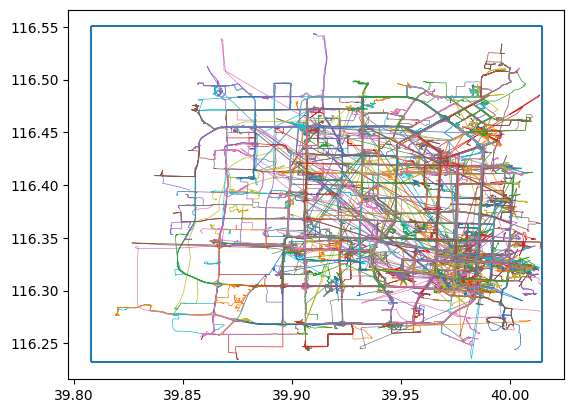

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.vlines(xl, yl, yh)
plt.vlines(xh, yl, yh)
plt.hlines(yl, xl, xh)
plt.hlines(yh, xl, xh)

for k in ds.keys:
    xy, key=ds(k)
    
    plt.plot(xy[:,0], xy[:,1], linewidth=0.5,  label=f'{k}')

plt.show()

# View Animated Trajectories

In [1]:
import os
from geolife.anim import view_trajectory

In [2]:
# pip install ipympl
%matplotlib ipympl

135_7 2436


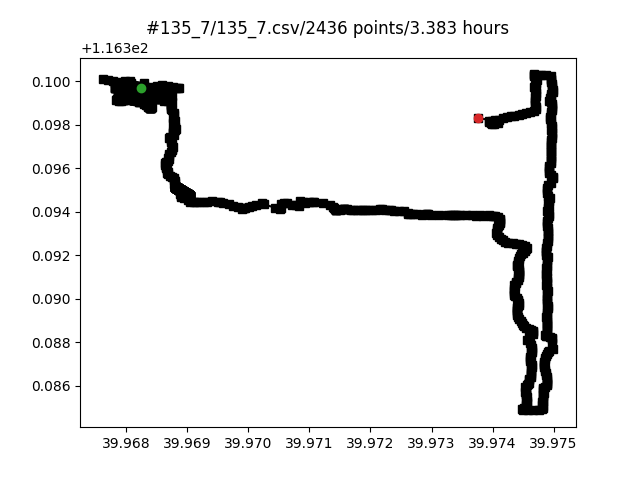

In [7]:
view_trajectory(
    basedir=os.path.join("__data__", "Geolife Trajectories Corrected"),
    keys='135_7', #<---- the numpy file name
    frame_interval=10,
    move_trail=15,
    zoom=True,
)

# Done